A continuación, una descripción breve de cada columna del archivo patients_data.csv:

- **Patient Number**: Identificador global del caso/paciente.
- **State Patient Number**: Identificador del caso dentro del estado/UT.
- **Date Announced**: Fecha en que se anunció oficialmente el caso.
- **Estimated Onset Date**: Fecha estimada de inicio de síntomas.
- **Age Bracket**: Edad o rango de edad del paciente.
- **Gender**: Género del paciente.
- **Detected City**: Ciudad donde se detectó/el registró el caso.
- **Detected District**: Distrito donde se detectó el caso.
- **Detected State**: Estado/UT donde se detectó el caso.
- **State code**: Código/abreviatura del estado/UT.
- **Current Status**: Estado actual del caso (por ejemplo: Hospitalized, Recovered, Deceased, Migrated).
- **Notes**: Observaciones adicionales del registro.
- **Contracted from which Patient (Suspected)**: ID del paciente fuente sospechado del contagio.
- **Nationality**: Nacionalidad del paciente.
- **Type of transmission**: Tipo de transmisión (Imported, Local, Community, etc.).
- **Status Change Date**: Fecha del cambio de estado (p. ej., recuperación o fallecimiento).
- **Source_1**: Enlace o referencia principal de la información.
- **Source_2**: Enlace o referencia secundaria.
- **Source_3**: Enlace o referencia adicional.
- **Backup Notes**: Notas de respaldo/clarificaciones internas.
- **Num Cases**: Número de casos representados por el registro (usualmente 1; a veces agregados).
- **Entry_ID**: Identificador interno/único de la entrada.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import numpy as np
import seaborn as sns
import calmap
import plotly.express as px
import json

ya terminamos el análisis exploratorio y la limpieza siuuu, ahora falta el análisis final :(

In [6]:
# Download latest version
#path_brfss = kagglehub.dataset_download("lplenka/brfss-data")
path_covid = kagglehub.dataset_download("imdevskp/covid19-corona-virus-india-dataset")

print("Path to dataset files:", path_covid)

Path to dataset files: /home/isabel/.cache/kagglehub/datasets/imdevskp/covid19-corona-virus-india-dataset/versions/186


In [7]:
df = pd.read_csv(path_covid + "/patients_data.csv", encoding="latin1", low_memory=False)

In [8]:
cols = list(df.columns)
[(i, cols[i]) for i in [4,12,13,14,15,18,19]]

[(4, 'Age Bracket'),
 (12, 'Contracted from which Patient (Suspected)'),
 (13, 'Nationality'),
 (14, 'Type of transmission'),
 (15, 'Status Change Date'),
 (18, 'Source_3'),
 (19, 'Backup Notes')]

In [9]:
df.size, df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247236 entries, 0 to 247235
Data columns (total 22 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Patient Number                             99793 non-null   float64
 1   State Patient Number                       110759 non-null  object 
 2   Date Announced                             247234 non-null  object 
 3   Estimated Onset Date                       0 non-null       float64
 4   Age Bracket                                108030 non-null  object 
 5   Gender                                     110800 non-null  object 
 6   Detected City                              12052 non-null   object 
 7   Detected District                          238066 non-null  object 
 8   Detected State                             247217 non-null  object 
 9   State code                                 247114 non-null  object 
 10  Current 

### Primeros problemas presentados:
- Columnas con valores de distintos tipos.
- Cantidad de valores nulos significativas en varias columnas como *Contracted from which Patient (Suspected)", "Nationality", "Type of transmission"* 
-  La columna *"State Patient Number"* debería ser de tipo númerico pero está como tipo Object.
- La columna *"Estimated Onset Date"* tiene todos los valores nulos, por lo que no nos proporciona información.

In [10]:
df.head(10)

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases,Entry_ID
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1.0,NaN
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1.0,NaN
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1.0,NaN
5,6.0,NaN,03/03/2020,NaN,69,M,Jaipur,Italians,Rajasthan,RJ,...,NaN,Italy,Imported,03/03/2020,https://indianexpress.com/article/india/corona...,https://economictimes.indiatimes.com/news/poli...,https://twitter.com/PTI_News/status/1240878975...,Italian tourist,1.0,NaN
6,7.0,NaN,04/03/2020,NaN,55,NaN,Gurugram,Italians,Haryana,HR,...,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN
7,8.0,NaN,04/03/2020,NaN,55,NaN,Gurugram,Italians,Haryana,HR,...,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN
8,9.0,NaN,04/03/2020,NaN,55,NaN,Gurugram,Italians,Haryana,HR,...,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN
9,10.0,NaN,04/03/2020,NaN,55,NaN,Gurugram,Italians,Haryana,HR,...,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN


In [11]:
df.tail(10)

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases,Entry_ID
247226,NaN,NaN,04/08/2020,NaN,NaN,NaN,NaN,NaN,Assam,AS,...,NaN,NaN,NaN,NaN,https://covid19.assam.gov.in/all-districts/,NaN,NaN,NaN,-5362.0,218990.0
247227,NaN,NaN,06/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218991.0
247228,NaN,NaN,06/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218992.0
247229,NaN,NaN,06/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218993.0
247230,NaN,NaN,06/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218994.0
247231,NaN,NaN,06/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218995.0
247232,NaN,NaN,06/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218996.0
247233,NaN,NaN,06/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218997.0
247234,NaN,NaN,06/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218998.0
247235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218999.0


In [12]:
df.isnull().sum()
df.isnull().sum().sum()
#247236

np.int64(2911862)

In [13]:
total = len(df)
nulos = df.isna().sum()
no_nulos = df.notna().sum()

tabla_nulos = pd.DataFrame({
    "Columna": df.columns,
    "Nulos (%)": [f"{n} ({n/total*100:.2f}%)" for n in nulos],
    "No nulos (%)": [f"{nn} ({nn/total*100:.2f}%)" for nn in no_nulos],
})

# Ordenar por mayor porcentaje de nulos (opcional)
tabla_nulos["_pct_nulos"] = (nulos/total*100).values
tabla_nulos = (
    tabla_nulos.sort_values("_pct_nulos", ascending=False)
               .drop(columns="_pct_nulos")
               .reset_index(drop=True)
)
tabla_nulos

,Columna,Nulos (%),No nulos (%)
0,Estimated Onset Date,247236 (100.00%),0 (0.00%)
1,Backup Notes,246875 (99.85%),361 (0.15%)
2,Source_3,246638 (99.76%),598 (0.24%)
3,Nationality,245682 (99.37%),1554 (0.63%)
4,Contracted from which Patient (Suspected),245312 (99.22%),1924 (0.78%)
5,Type of transmission,244246 (98.79%),2990 (1.21%)
6,Source_2,240971 (97.47%),6265 (2.53%)
7,Detected City,235184 (95.13%),12052 (4.87%)
8,Status Change Date,219456 (88.76%),27780 (11.24%)
9,Patient Number,147443 (59.64%),99793 (40.36%)


Según la tabla anterior, la mayoría de las columnas tienen más de la mitad de los valores nulos. (Preocupante😭)

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient Number,99793.0,NaN,NaN,NaN,50683.789174,29418.71938,1.0,24949.0,50945.0,75896.0,102610.0
State Patient Number,110759,82333,KA-P298,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date Announced,247234,161,18/07/2020,6884,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estimated Onset Date,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age Bracket,108030,238,30.0,1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,110800,6,M,72356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detected City,12052,2318,Patna,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detected District,238066,781,Bengaluru Urban,44366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detected State,247217,36,Karnataka,102132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State code,247114,36,KA,102132,NaN,NaN,NaN,NaN,NaN,NaN,NaN


¿Un valor negativo en **"Num Cases"**? ¿Un valor de **345** en "Age bracket"? Curioso

In [15]:
df['Notes'].unique()

array(['Travelled from Wuhan', 'Travelled from Austria, Italy',
       'Travelled from Dubai to Bangalore on 20th Feb, stayed there for 2 days and took a bus to Hyderabad',
       ...,
       'SARI;Breathlessness;-;04-08-2020;05-08-2020 at Designated Hospital;',
       'AIIMS Rishikesh', 'Doon Medical College'],
      shape=(8381,), dtype=object)

La columna *'Notes'* sería valiosa si los valores tuvieran poco datos concisos como "Travelled from", para poder llenar otras columnas pero es texto sin clasificación especifica (muchos).

Viendo a simple vista las columnas **"State Patient Number"**, **"Detected State"**, **"Detected District"**, **"State code""** están relacionadas entre sí. Ya que la primera no es más que una concatenacion de los códigos del estado, distrito y paciente. Vamos a buscar si hay filas donde el código local del paciente nos puede ayudar a llenar valores vacíos de las columnas con información geográfica.

In [16]:
# Verificar filas donde hay identificador local pero faltan datos geográficos (estado y distrito)
filtro_local_sin_geo = df[
    df["State Patient Number"].notna() & (
        df["Detected State"].isna() |
        df["Detected District"].isna() #|
        #df["Detected City"].isna()
    )
]
print(f"Filas con State Patient Number pero con datos geográficos faltantes: {len(filtro_local_sin_geo)}")
#print(filtro_local_sin_geo[["State Patient Number", "Detected State", "Detected District", "Detected City", "Patient Number"]].head())

Filas con State Patient Number pero con datos geográficos faltantes: 0


In [17]:
# Filas donde hay código de estado pero falta el nombre del estado
falta_estado = df[df["State code"].notna() & df["Detected State"].isna()]
print("Filas con código de estado pero sin nombre de estado:", len(falta_estado))

Filas con código de estado pero sin nombre de estado: 0


## Limpieza de datos

Primero que nada, crear una copia del dataset 

In [18]:
df_copy = df.copy()

Podemos empezar borrando las siguientes columnas:

- **Estimated Onset Date**: Valores 100% nulos, sin información.
- **Notes**: Texto libre difícil de analizar sin NLP.
- **Backup Notes**: Lo mismo de arriba: notas secundarias, y muy pocos registros útiles.
- **Source_2 y Source_3**: Más del 97% de valores nulos, no esenciales, no nos sirven para este análisis estadístico.
- **Source_1**: Tiene pocos nulos pero de nuevo, no sirven para este análisis.
- **Num Cases**: No es una columna clara de información, no hay correlación entre los otros datos, parece más bien un cluster pero no es veridico. 
- **State Patient Number**: Como vimos en el análisis exploratorio, nos es más fácil trabajar con las columnas con informmación geográfica y el identificador del paciente global. Como no nos aporta información para llenar valores nulos en esas columnas, resulta una columna con información inútil para este análisis.
- **Entry_ID**: Al parecer es un identificador único para cada registro, pero como ya tenemos uno global ("Patient Number"), es como repetitivo.
Las otras columnas con más del 80% de valores nulos siguen teniendo información relevante para un análisis temporal o geográfico, así que por ahora las dejaremos.
- **State code**: Puesto que ya tenemos otras columnas de ubicación geográfica, esta columna no nos interesa.
- **Contracted from which Patient (Suspected)**: Interesante para una red de contagios pero el 99.22% de los datos son nules y la red sería poco representativa.
- **Status Date Change**: Más del 80% de datos vacíos, muy pocos datos para un buen análisis.

In [19]:
columnas_a_borrar = [
    "Estimated Onset Date",
    "Notes",
    "Backup Notes",
    "Source_1",
    "Source_2",
    "Source_3",
    "Num Cases",
    "State Patient Number",
    "Entry_ID",
    "State code",
    "Contracted from which Patient (Suspected)",
    "Detected City",
    "Status Change Date"
]

df_copy = df_copy.drop(columns=columnas_a_borrar)
print(f"Columnas eliminadas: {columnas_a_borrar}. Nueva forma: {df_copy.shape}")

Columnas eliminadas: ['Estimated Onset Date', 'Notes', 'Backup Notes', 'Source_1', 'Source_2', 'Source_3', 'Num Cases', 'State Patient Number', 'Entry_ID', 'State code', 'Contracted from which Patient (Suspected)', 'Detected City', 'Status Change Date']. Nueva forma: (247236, 9)


In [20]:
total_copy = len(df_copy)
nulos_copy = df_copy.isna().sum()
no_nulos_copy = df_copy.notna().sum()

tabla_nulos_copy = pd.DataFrame({
    "Columna": df_copy.columns,
    "Nulos (%)": [f"{n} ({n/total_copy*100:.2f}%)" for n in nulos_copy],
    "No nulos (%)": [f"{nn} ({nn/total_copy*100:.2f}%)" for nn in no_nulos_copy],
})

# Ordenar por mayor porcentaje de nulos (opcional)
tabla_nulos_copy["_pct_nulos"] = (nulos_copy/total_copy*100).values
tabla_nulos_copy = (
    tabla_nulos_copy.sort_values("_pct_nulos", ascending=False)
               .drop(columns="_pct_nulos")
               .reset_index(drop=True)
)
tabla_nulos_copy

,Columna,Nulos (%),No nulos (%)
0,Nationality,245682 (99.37%),1554 (0.63%)
1,Type of transmission,244246 (98.79%),2990 (1.21%)
2,Patient Number,147443 (59.64%),99793 (40.36%)
3,Age Bracket,139206 (56.30%),108030 (43.70%)
4,Gender,136436 (55.18%),110800 (44.82%)
5,Detected District,9170 (3.71%),238066 (96.29%)
6,Detected State,19 (0.01%),247217 (99.99%)
7,Current Status,12 (0.00%),247224 (100.00%)
8,Date Announced,2 (0.00%),247234 (100.00%)


Ahora vamos a buscar cómo aparecen los valores nulos.

In [21]:
valnull = ["---", "--","-", "unknown", "Unknown", -999, "-", "n/a", "na", "none", "nan", "NaN", "unspecified", "missing", ""]

conteo_valnull = {}

for col in df_copy.columns:
    vals = df_copy[col].astype(str).str.strip().str.lower()
    for t in valnull:
        count = (vals == t).sum()
        if count > 0:
            if t not in conteo_valnull:
                conteo_valnull[t] = count
            else:
                conteo_valnull[t] += count

tabla_resumen = pd.DataFrame(list(conteo_valnull.items()), columns=["Valor nulo", "Total"])
tabla_resumen.sort_values("Total", ascending=False)

,Valor nulo,Total
0,nan,922216
1,unknown,27


Los 34 valores diferentes de **nan** que igual dan información de valores nulos, se identifican en el DF como datos no nulos por lo cuál resulta importante homogeneizar los valores nulos para que pandas los interprete como tal.

In [22]:
# Homogeneizar valores nulos - versión completa
faltantes = ["---", "--", "-", "unknown", "n/a", "na", "none", "nan", "unspecified", "missing", ""]

print(f"Total de valores nulos antes: {df_copy.isna().sum().sum()}")

# Para columnas de texto (object)
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        # Estandarizar y reemplazar
        df_copy[col] = df_copy[col].astype(str).str.strip().str.lower()
        df_copy.loc[df_copy[col].isin(faltantes), col] = pd.NA
    else:
        # Para columnas numéricas, identificar valores específicos como -999, -1 
        # que a veces se usan como marcadores de valores faltantes
        if df_copy[col].dtype.kind in 'ifc':  # int, float, complex
            # Reemplazar valores que podrían representar faltantes en numéricos
            df_copy.loc[df_copy[col] == "", col] = pd.NA

print(f"Total de valores nulos después: {df_copy.isna().sum().sum()}")

Total de valores nulos antes: 922216
Total de valores nulos después: 922243


In [23]:
# Eliminar duplicados
df_copy = df_copy.drop_duplicates()
df_copy = df_copy.reset_index(drop=True)

# Eliminar filas donde todas las columnas son nulas
df_copy = df_copy.dropna(how='all')
df_copy = df_copy.reset_index(drop=True)
print(f"Forma final del DataFrame: {df_copy.shape}")

Forma final del DataFrame: (183428, 9)


In [24]:
def limpiar_edad(valor):
    v = str(valor).strip().lower()
    if v in ["", "nan", "none"]:
        return np.nan
    if "month" in v or "day" in v or "days" in v or "s" in v:
        return 0
    if "-" in v:
        partes = v.split("-")
        try:
            return int(round((float(partes[0]) + float(partes[1])) / 2))
        except:
            return np.nan
    try:
        edad = float(v)
        return int(round(edad)) if edad >= 1 else 0
    except:
        return np.nan

df_copy["Age Bracket"] = df_copy["Age Bracket"].apply(limpiar_edad).astype("Int32")
print(df_copy["Age Bracket"].unique().tolist())

[20, <NA>, 45, 24, 69, 55, 70, 16, 27, 59, 65, 75, 54, 53, 61, 25, 63, 46, 3, 48, 40, 47, 13, 96, 89, 85, 68, 26, 33, 76, 37, 43, 21, 42, 44, 51, 31, 32, 29, 67, 49, 52, 22, 18, 34, 28, 56, 35, 50, 30, 38, 23, 19, 58, 41, 2, 60, 74, 39, 17, 36, 57, 64, 81, 62, 73, 9, 7, 66, 12, 1, 14, 11, 6, 92, 72, 15, 77, 10, 80, 71, 78, 79, 90, 4, 8, 5, 0, 88, 98, 83, 82, 84, 87, 86, 95, 94, 99, 91, 93, 97, 100, 105]


In [25]:
# Estandarización de tipos en el DataFrame

# Fechas a datetime
fechas = ["Date Announced", "Status Change Date"]
for col in fechas:
    if col in df_copy.columns:
        df_copy[col] = pd.to_datetime(df_copy[col], errors="coerce", dayfirst=True)

# Numéricas a float/Int64
numericas = ["Patient Number", "Age Bracket"]
for col in numericas:
    if col in df_copy.columns:
        df_copy[col] = pd.to_numeric(df_copy[col], errors="coerce").astype("Int32")

# Categóricas a string
categoricas = [
    "Gender", "Detected City", "Detected District", "Detected State", "State code",
    "Current Status", "Nationality", "Type of transmission"
]
for col in categoricas:
    if col in df_copy.columns:
        df_copy[col] = df_copy[col].astype("string")


In [26]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183428 entries, 0 to 183427
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Patient Number        99792 non-null   Int32         
 1   Date Announced        183428 non-null  datetime64[ns]
 2   Age Bracket           69568 non-null   Int32         
 3   Gender                72277 non-null   string        
 4   Detected District     174780 non-null  string        
 5   Detected State        183418 non-null  string        
 6   Current Status        183425 non-null  string        
 7   Nationality           1554 non-null    string        
 8   Type of transmission  2989 non-null    string        
dtypes: Int32(2), datetime64[ns](1), string(6)
memory usage: 11.5 MB


In [27]:
# Normalización de texto en columnas categóricas
print("Valores únicos de Gender antes de limpiar:")
print(df_copy['Gender'].unique().tolist())
print("\nValores únicos de Type of transmission antes de limpiar:")
print(df_copy['Type of transmission'].unique().tolist())


cols_texto = ["Gender", "Type of transmission"]

for col in cols_texto:
    if col in df_copy.columns:
        # strip, lower, quitar espacios dobles
        df_copy[col] = (
            df_copy[col]
            .astype(str)
            .str.strip()
            .str.lower()
            .str.replace(r"\s+", " ", regex=True)
        )

# Unificar etiquetas Gender
gender_map = {
    "male": "male", "m": "male", "m,": "male", "female": "female", "f": "female",
    "non-binary": "non-binary", "other": "other"
}
df_copy["Gender"] = df_copy["Gender"].map(gender_map).astype("string")

# Unificar etiquetas Type of transmission (ejemplo)
trans_map = {
    "local": "local", "local transmission": "local",
    "imported": "imported", "imported case": "imported",
}
df_copy["Type of transmission"] = df_copy["Type of transmission"].map(trans_map).astype("string")

print("\nValores únicos de Gender después de limpiar:")
print(df_copy['Gender'].unique().tolist())
print("\nValores únicos de Type of transmission después de limpiar:")
print(df_copy['Type of transmission'].unique().tolist())



Valores únicos de Gender antes de limpiar:
['f', <NA>, 'm', 'non-binary', 'm,', 'femal e']

Valores únicos de Type of transmission antes de limpiar:
['imported', 'local', 'tbd', <NA>]

Valores únicos de Gender después de limpiar:
['female', <NA>, 'male', 'non-binary']

Valores únicos de Type of transmission después de limpiar:
['imported', 'local', <NA>]


In [28]:
df_copy = df_copy.reset_index(drop=True) #por siacasoxd

In [29]:
# Reenumerar el Patient Number de 1 hasta el número de filas y asegurar tipo Int32
df_copy["Patient Number"] = pd.Series(range(1, df_copy.shape[0] + 1), dtype="Int32")
df_copy.tail()

,Patient Number,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Nationality,Type of transmission
183423,183424,2020-08-04,<NA>,<NA>,chirang,assam,hospitalized,<NA>,<NA>
183424,183425,2020-08-04,<NA>,<NA>,dima hasao,assam,hospitalized,<NA>,<NA>
183425,183426,2020-08-04,<NA>,<NA>,majuli,assam,hospitalized,<NA>,<NA>
183426,183427,2020-08-04,<NA>,<NA>,charaideo,assam,hospitalized,<NA>,<NA>
183427,183428,2020-08-06,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Vamos a eliminar estos dupllicados porque no aportan información útil

In [30]:
# Eliminar duplicados
df_copy = df_copy.drop_duplicates()

# Eliminar registros con menos de 2 valores no nulos
df_copy = df_copy[df_copy.notna().sum(axis=1) >= 2]
df_copy = df_copy.reset_index(drop=True)

print(f"Forma final del DataFrame: {df_copy.shape}")

Forma final del DataFrame: (183428, 9)


In [31]:
df_copy["Age Bracket"].describe()

count      69568.0
mean     37.592859
std      18.089607
min            0.0
25%           25.0
50%           35.0
75%           50.0
max          105.0
Name: Age Bracket, dtype: Float64

A este punto se puede tomar una decisión de si corregir esos registros para que mantengan coherencia temporal o borrarlos. Sin tener certeza de si el error es por toma de dattos o por evento real, para no manipular datos se decide borrar esos datos puesto que representan el 0.0326% del dataset hasta ahora.

In [32]:
df_copy["Detected State"].value_counts()

Detected State
karnataka                                   42844
tamil nadu                                  28702
maharashtra                                 15215
bihar                                       13672
uttar pradesh                               13376
gujarat                                      8541
madhya pradesh                               7693
rajasthan                                    7342
west bengal                                  4290
andhra pradesh                               4257
odisha                                       4070
jammu and kashmir                            3385
haryana                                      3304
delhi                                        3218
kerala                                       3196
punjab                                       3004
telangana                                    2783
chhattisgarh                                 2274
jharkhand                                    2104
uttarakhand                        

In [33]:
# Exportar todos los valores únicos de Detected District a un archivo txt
distritos_unicos = pd.Series(df_copy["Detected District"].unique()).dropna().sort_values()
distritos_unicos.to_csv("distritos_unicos.txt", index=False, header=False)
print("Exportados a distritos_unicos.txt")

Exportados a distritos_unicos.txt


In [34]:
df_copy["Detected District"].isna().sum()

np.int64(8648)

In [35]:
# Contar cuántos registros tienen distritos no geográficos
distritos_raros = [
    "airport quarantine", "bsf camp", "capf personnel", "evacuees", "foreign evacuees",
    "italians", "other region", "other state", "others", "railway quarantine", "unassigned"
]
conteo_raros = df_copy["Detected District"].isin(distritos_raros).sum()
print(f"Registros con distritos no geográficos: {conteo_raros}")

Registros con distritos no geográficos: 1391


In [36]:
# Marcar distritos no geográficos como nulos
distritos_raros = [
    "airport quarantine", "bsf camp", "capf personnel", "evacuees", "foreign evacuees",
    "italians", "other region", "other state", "others", "railway quarantine", "unassigned"
]
df_copy.loc[df_copy["Detected District"].isin(distritos_raros), "Detected District"] = pd.NA

In [37]:
# Estado y distrito incoherentes
print(df_copy[df_copy["Detected State"].isna() & df_copy["Detected District"].notna()][["Detected State", "Detected District"]])

      Detected State Detected District
32902           <NA>          amravati
81221           <NA>         changlang


- Amravati → es un distrito del estado de Maharashtra
- Changlang → es un distrito de Arunachal Pradesh

Vamos a reemplazar los valores nulos por estos

In [38]:
# Corregir valores nulos de Detected State usando el distrito
df_copy.loc[
    (df_copy["Detected State"].isna()) & (df_copy["Detected District"] == "amravati"),
    "Detected State"
] = "maharashtra"

df_copy.loc[
    (df_copy["Detected State"].isna()) & (df_copy["Detected District"] == "changlang"),
    "Detected State"
] = "arunachal pradesh"

In [39]:
df_copy.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Patient Number,183428.0,<NA>,<NA>,<NA>,91714.5,1.0,45857.75,91714.5,137571.25,183428.0,52951.246926
Date Announced,183428,NaN,NaN,NaN,2020-06-11 05:17:58.108031744,2020-01-30 00:00:00,2020-05-16 00:00:00,2020-06-14 00:00:00,2020-07-12 00:00:00,2020-08-06 00:00:00,NaN
Age Bracket,69568.0,<NA>,<NA>,<NA>,37.592859,0.0,25.0,35.0,50.0,105.0,18.089607
Gender,72276,3,male,46787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detected District,173389,719,chennai,15293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detected State,183420,36,karnataka,42844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Status,183425,5,hospitalized,134286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nationality,1554,12,india,1503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type of transmission,2352,2,local,1720,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_copy.isnull().sum()

Patient Number               0
Date Announced               0
Age Bracket             113860
Gender                  111152
Detected District        10039
Detected State               8
Current Status               3
Nationality             181874
Type of transmission    181076
dtype: int64

In [41]:
df_copy["Nationality"].value_counts()

Nationality
india                                1503
italy                                  18
indonesia                              15
united kingdom                          7
thailand                                2
phillipines                             2
removed due to change in bulletin       2
canada                                  1
united states of america                1
tibet                                   1
malaysia                                1
myanmar                                 1
Name: count, dtype: Int64

In [42]:
df_copy.loc[df_copy["Nationality"] == "removed due to change in bulletin", "Nationality"] = pd.NA

In [43]:
df_copy["Current Status"].unique()

<StringArray>
['recovered', 'hospitalized', 'deceased', 'migrated', 'migrated_other', <NA>]
Length: 6, dtype: string

In [44]:
df_copy["Current Status"] = df_copy["Current Status"].replace({"migrated_other": "migrated"})

# Tratamiento de nulos por fin

Faltantes Age Bracket: 62.07%
Mediana: 35.0 | Sesgo (skew): 0.34


/tmp/ipykernel_65459/1184807347.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot([s.dropna(), s_imp], labels=["Original", "Mediana"])


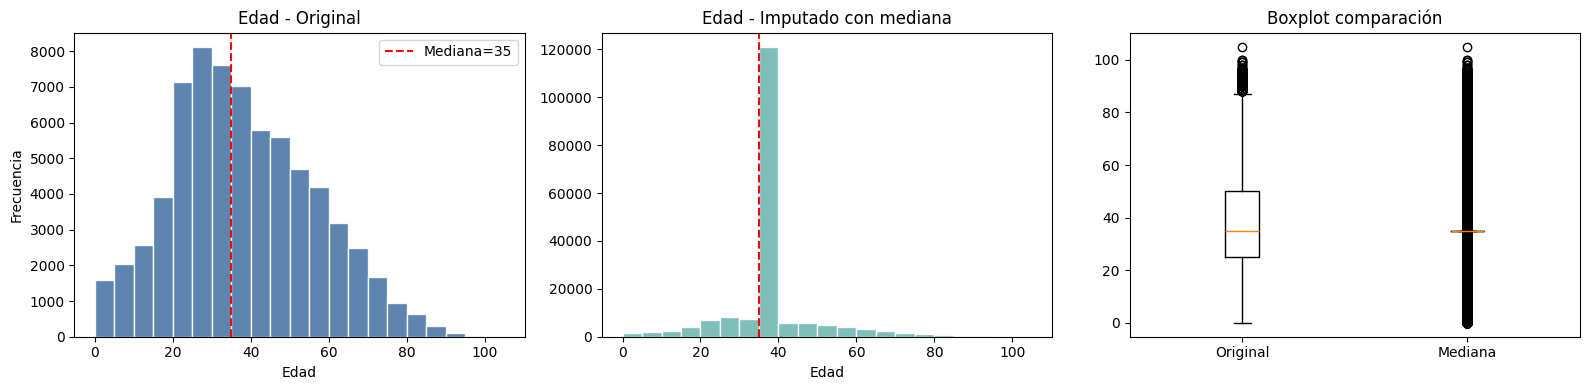

In [45]:
s = df_copy["Age Bracket"].astype("float")
missing_pct = s.isna().mean()
med = float(s.median())
skew = float(s.skew())
max_age = int(np.nanmax(s))
bins = np.arange(0, max_age + 5, 5)

print(f"Faltantes Age Bracket: {missing_pct:.2%}")
print(f"Mediana: {med:.1f} | Sesgo (skew): {skew:.2f}")

fig, axes = plt.subplots(1, 3, figsize=(16,4))

# Original
axes[0].hist(s.dropna(), bins=bins, color="#4C78A8", alpha=0.9, edgecolor="white")
axes[0].axvline(med, color="red", ls="--", label=f"Mediana={med:.0f}")
axes[0].set_title("Edad - Original")
axes[0].set_xlabel("Edad"); axes[0].set_ylabel("Frecuencia")
axes[0].legend()

# Imputado con mediana (solo para visualizar el efecto)
s_imp = s.fillna(med)
axes[1].hist(s_imp, bins=bins, color="#72B7B2", alpha=0.9, edgecolor="white")
axes[1].axvline(med, color="red", ls="--")
axes[1].set_title("Edad - Imputado con mediana")
axes[1].set_xlabel("Edad")

# Boxplots comparación
axes[2].boxplot([s.dropna(), s_imp], labels=["Original", "Mediana"])
axes[2].set_title("Boxplot comparación")
plt.tight_layout()
plt.show()

/tmp/ipykernel_65459/4020897122.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot([observed_ages, s_imp], labels=["Original", "Imputado"])


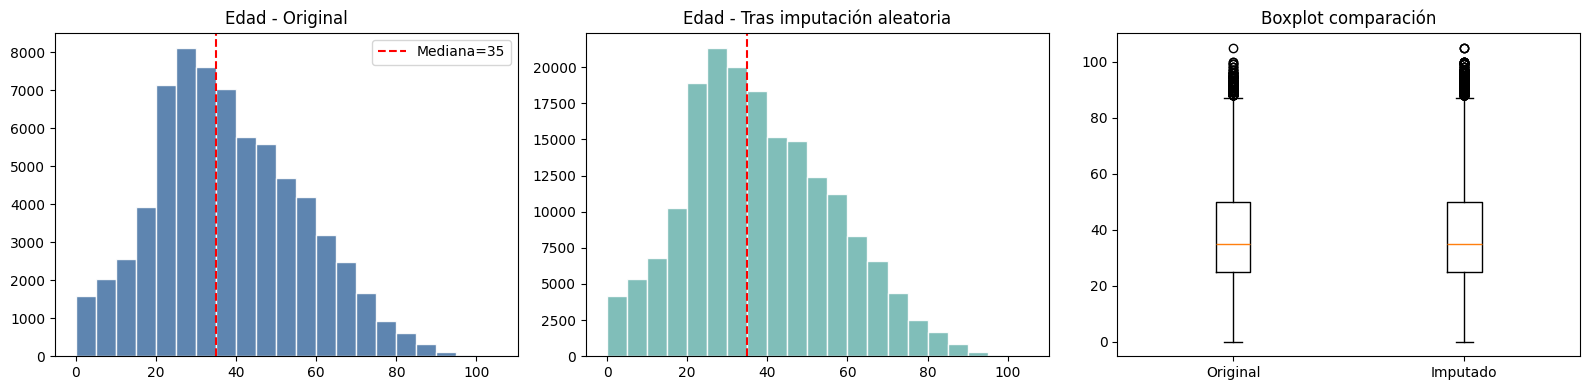

In [46]:
import numpy as np
np.random.seed(42)

age = "Age Bracket"
# Flag para identificar imputados
df_copy["age_imputed_flag"] = df_copy[age].isna()

# Imputación aleatoria: tomar valores existentes y asignar aleatoriamente a los nulos
missing_mask = df_copy[age].isna()
observed_ages = df_copy.loc[~missing_mask, age].dropna().values
df_copy.loc[missing_mask, age] = np.random.choice(observed_ages, missing_mask.sum(), replace=True)

# Limitar valores razonables
df_copy[age] = df_copy[age].clip(0, 105).round().astype("Int32")

# Graficar
s = df_copy[age].astype(float)
s_imp = s.copy()
s_imp[missing_mask] = np.random.choice(observed_ages, missing_mask.sum(), replace=True)

fig, axes = plt.subplots(1, 3, figsize=(16,4))
bins = np.arange(0, int(np.nanmax(s)) + 5, 5)
med = float(np.nanmedian(s))

axes[0].hist(observed_ages, bins=bins, color="#4C78A8", alpha=0.9, edgecolor="white")
axes[0].axvline(med, color="red", ls="--", label=f"Mediana={med:.0f}")
axes[0].set_title("Edad - Original"); axes[0].legend()

axes[1].hist(s_imp, bins=bins, color="#72B7B2", alpha=0.9, edgecolor="white")
axes[1].axvline(med, color="red", ls="--")
axes[1].set_title("Edad - Tras imputación aleatoria")

axes[2].boxplot([observed_ages, s_imp], labels=["Original", "Imputado"])
axes[2].set_title("Boxplot comparación")
plt.tight_layout(); plt.show()

# Ahora sí, reemplaza la columna real y elimina la flag si no la necesitas
df_copy[age] = s_imp.clip(0, 105).round().astype("Int32")
df_copy = df_copy.drop(columns=["age_imputed_flag"], errors="ignore")

In [47]:
df_copy.isna().sum()

Patient Number               0
Date Announced               0
Age Bracket                  0
Gender                  111152
Detected District        10039
Detected State               8
Current Status               3
Nationality             181876
Type of transmission    181076
dtype: int64

Para el estado actual (actual del 2020 xd) y el Detected State solo vamos a reemplazar por la moda porque son muy muy pocos datos

In [48]:
# Imputar nulos con la moda en Current Status y Detected State
df_copy["Current Status"] = df_copy["Current Status"].fillna(df_copy["Current Status"].mode()[0])
df_copy["Detected State"] = df_copy["Detected State"].fillna(df_copy["Detected State"].mode()[0])

In [49]:
df_copy.isna().sum()

Patient Number               0
Date Announced               0
Age Bracket                  0
Gender                  111152
Detected District        10039
Detected State               0
Current Status               0
Nationality             181876
Type of transmission    181076
dtype: int64

In [50]:
# Imputar valores faltantes en Gender según la distribución real
dist_gender = df_copy["Gender"].value_counts(normalize=True, dropna=True)
n_missing_gender = df_copy["Gender"].isna().sum()
np.random.seed(42)
df_copy.loc[df_copy["Gender"].isna(), "Gender"] = np.random.choice(
    dist_gender.index,
    size=n_missing_gender,
    p=dist_gender.values
)

In [51]:
df_copy["Gender"].value_counts()

Gender
male          118760
female         64627
non-binary        41
Name: count, dtype: Int64

Creo que **"Nationality"** y **"Type of transmission"** son dificiles de imputar puesto que los datos son más del 98% de los datos, así que finalmente se borraran para evitar sesgos artificiales.

In [52]:
df_copy = df_copy.drop(columns=["Nationality", "Type of transmission"])

In [53]:
df_copy.isna().sum()

Patient Number           0
Date Announced           0
Age Bracket              0
Gender                   0
Detected District    10039
Detected State           0
Current Status           0
dtype: int64

Puesto que los distritos desconocidos representan un 5% de los valores nulos y además tenemos la información de estado. Podemos añadir la categoría de "Distrito desconocido"

In [54]:
# Reemplazar valores nulos en Detected District por "Distrito desconocido"
df_copy["Detected District"] = df_copy["Detected District"].fillna("Distrito desconocido")

In [55]:
df_copy.isna().sum()

Patient Number       0
Date Announced       0
Age Bracket          0
Gender               0
Detected District    0
Detected State       0
Current Status       0
dtype: int64

In [56]:
df_copy.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Patient Number,183428.0,<NA>,<NA>,<NA>,91714.5,1.0,45857.75,91714.5,137571.25,183428.0,52951.246926
Date Announced,183428,NaN,NaN,NaN,2020-06-11 05:17:58.108031744,2020-01-30 00:00:00,2020-05-16 00:00:00,2020-06-14 00:00:00,2020-07-12 00:00:00,2020-08-06 00:00:00,NaN
Age Bracket,183428.0,<NA>,<NA>,<NA>,37.642241,0.0,25.0,35.0,50.0,105.0,18.117672
Gender,183428,3,male,118760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detected District,183428,720,chennai,15293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detected State,183428,36,karnataka,42852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Status,183428,4,hospitalized,134289,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183428 entries, 0 to 183427
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Patient Number     183428 non-null  Int32         
 1   Date Announced     183428 non-null  datetime64[ns]
 2   Age Bracket        183428 non-null  Int32         
 3   Gender             183428 non-null  string        
 4   Detected District  183428 non-null  string        
 5   Detected State     183428 non-null  string        
 6   Current Status     183428 non-null  string        
dtypes: Int32(2), datetime64[ns](1), string(4)
memory usage: 8.7 MB


ya terminamos el análisis exploratorio y la limpieza siuuu, ahora falta el análisis final :(

# Análisis final de datos

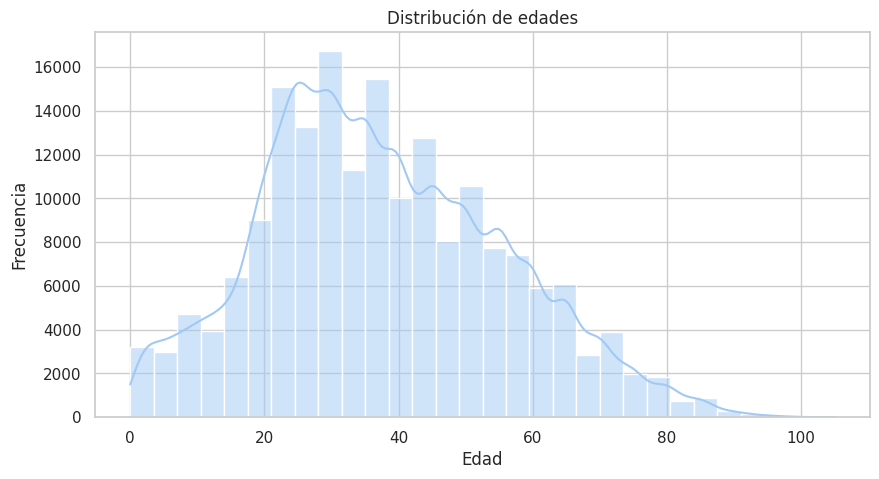

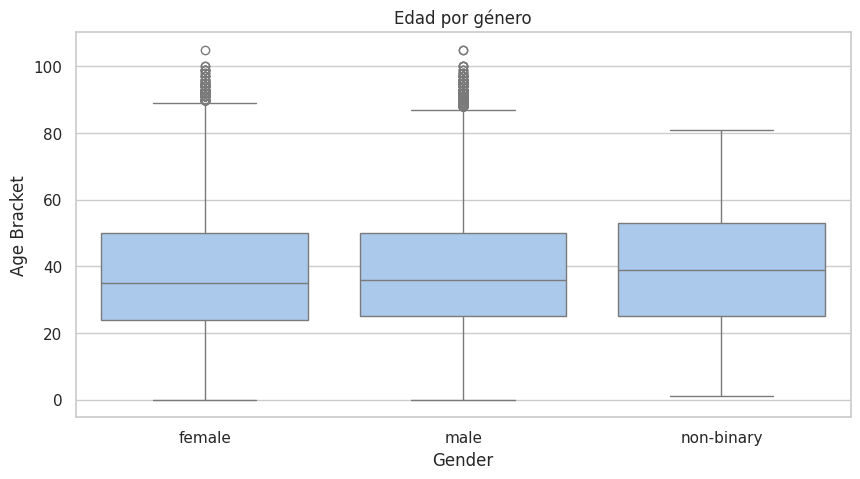

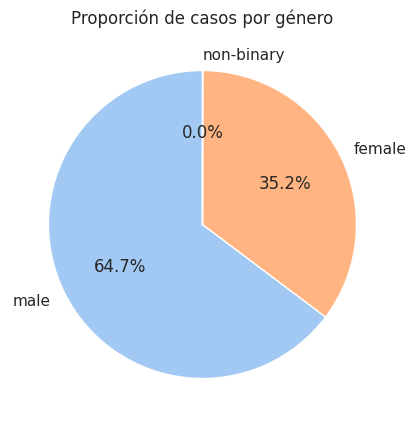

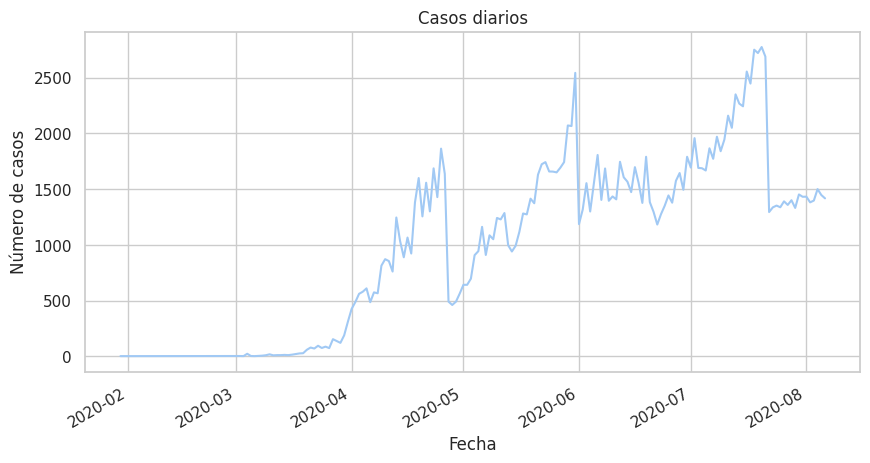

/tmp/ipykernel_65459/2651483386.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")


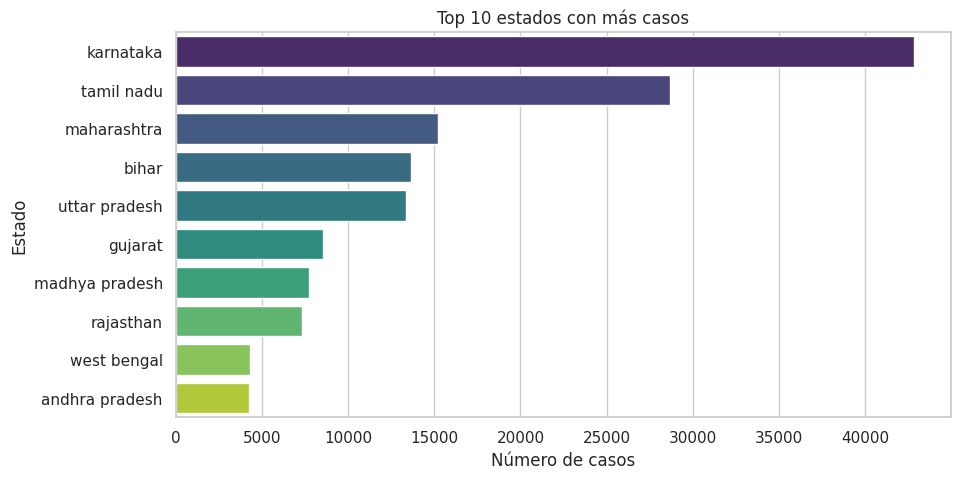

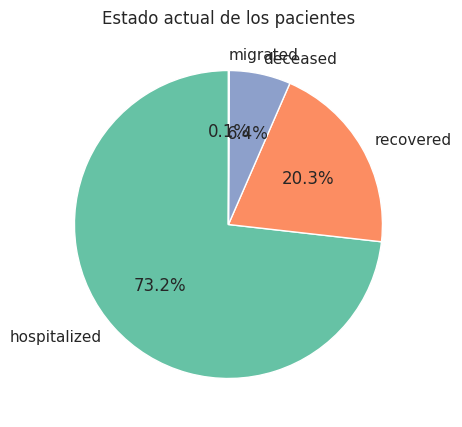

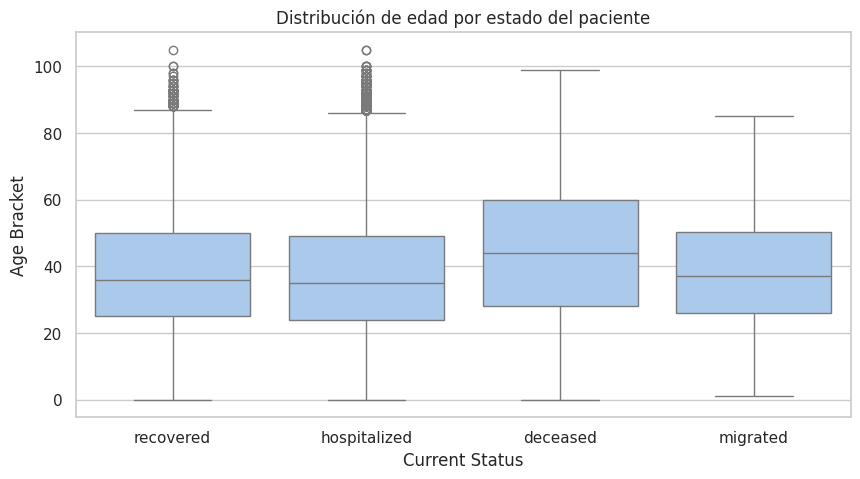

In [58]:
import pandas as pd
import matplotlib.pyplot as plt


# Configuración
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10,5)

# ========= 1. Distribución de edades =========
plt.figure()
sns.histplot(df_copy["Age Bracket"], bins=30, kde=True)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# ========= 2. Comparación de edades por género =========
plt.figure()
sns.boxplot(x="Gender", y="Age Bracket", data=df_copy)
plt.title("Edad por género")
plt.show()

# ========= 3. Proporción de género =========
plt.figure()
df_copy["Gender"].value_counts().plot.pie(autopct="%.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.ylabel("")
plt.title("Proporción de casos por género")
plt.show()

# ========= 4. Casos diarios =========
cases_daily = df_copy.groupby("Date Announced").size()
plt.figure()
cases_daily.plot()
plt.title("Casos diarios")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.show()

# ========= 5. Top 10 estados =========
top_states = df_copy["Detected State"].value_counts().head(10)
plt.figure()
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")
plt.title("Top 10 estados con más casos")
plt.xlabel("Número de casos")
plt.ylabel("Estado")
plt.show()

# ========= 6. Current Status =========
plt.figure()
df_copy["Current Status"].value_counts().plot.pie(autopct="%.1f%%", startangle=90, colors=sns.color_palette("Set2"))
plt.ylabel("")
plt.title("Estado actual de los pacientes")
plt.show()

# ========= 7. Edad por estado del paciente =========
plt.figure()
sns.boxplot(x="Current Status", y="Age Bracket", data=df_copy)
plt.title("Distribución de edad por estado del paciente")
plt.show()


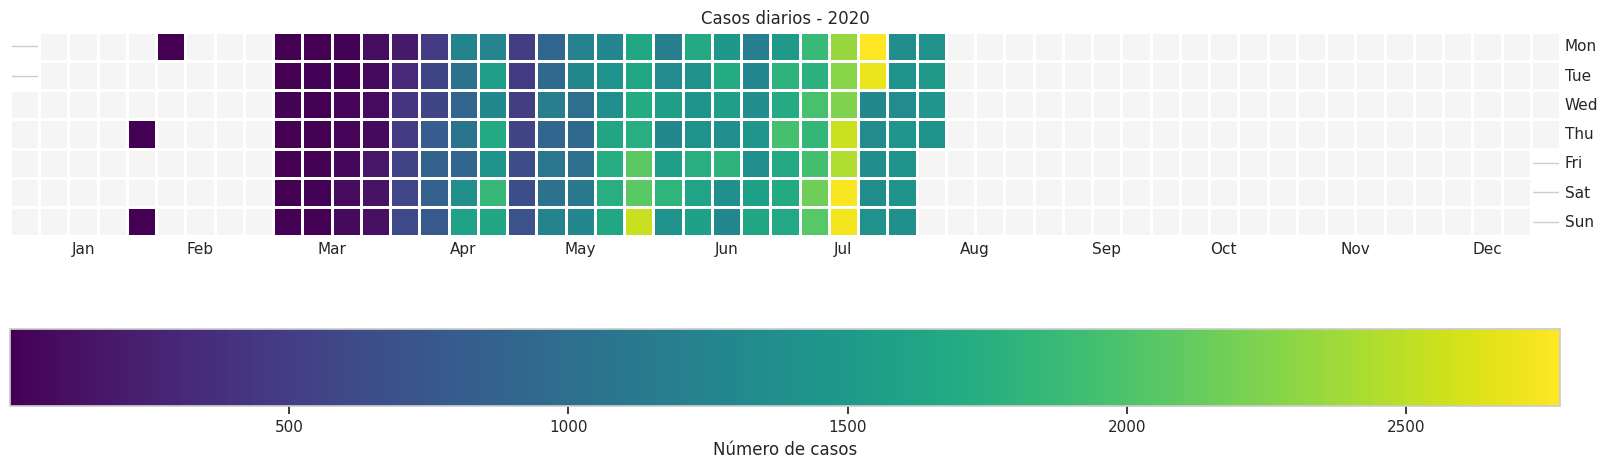

In [66]:
# Casos diarios
cases_daily = df_copy.groupby("Date Announced").size()
cases_daily.index = pd.to_datetime(cases_daily.index)

# Mapa de calor calendario
plt.figure(figsize=(20,8))
ax = calmap.yearplot(cases_daily, year=2020, cmap="viridis")
plt.title("Casos diarios - 2020")

# Agregar colorbar horizontal
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=cases_daily.min(), vmax=cases_daily.max()))
sm._A = []
plt.colorbar(sm, ax=ax, label='Número de casos', orientation='horizontal', pad=0.15)

plt.show()

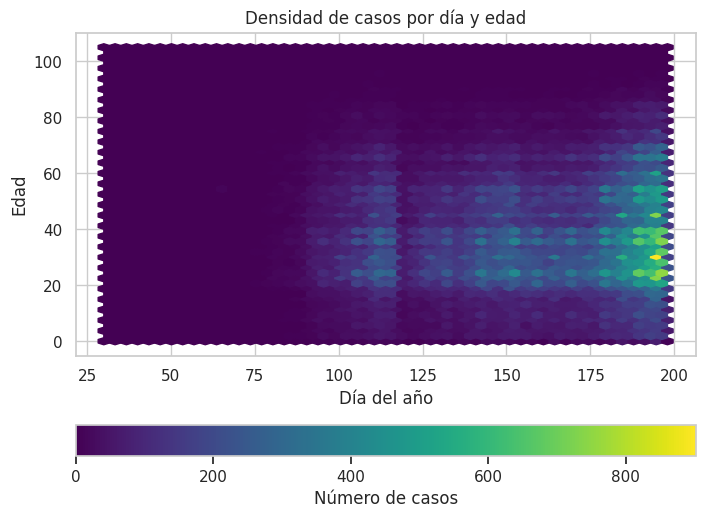

In [70]:
# Asegura que la columna "Date Announced" sea tipo datetime antes de usar .dt
df_copy["Date Announced"] = pd.to_datetime(df["Date Announced"], errors="coerce")



plt.figure(figsize=(8,6))
plt.hexbin(
    df_copy["Date Announced"].dt.dayofyear,
    df_copy["Age Bracket"].astype(float),
    gridsize=50,
    cmap="viridis"
)
plt.colorbar(label="Número de casos", orientation="horizontal", pad=0.15)
plt.xlabel("Día del año")
plt.ylabel("Edad")
plt.title("Densidad de casos por día y edad")
plt.show()

In [78]:
# Agrupa los casos por estado para el mapa
state_cases = (
    df_copy.groupby("Detected State")
    .size()
    .reset_index(name="cases")
    .rename(columns={"Detected State": "state"})
)

# Cargar el geojson de India
with open("india_state.geojson", "r") as f:
    india_state = json.load(f)

# Crear el mapa
fig = px.choropleth(
    state_cases,
    geojson=india_state,
    featureidkey="properties.ST_NM",  # clave del nombre del estado en el geojson
    locations="state",
    color="cases",
    color_continuous_scale="YlOrRd",
    title="Casos COVID en India por estado"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed